# Problem Statement
The aim of this project is to use historical bank loan data to predict a client's ability to repay future loans based on client's info and credit history.

# Content

1. Cleaning of data<br>
-Check for null values or rows<br>
-Impute or remove missing values<br>

2. EDA<br>
-Analysing of data distribution pattern<br>
-Data Encoding<br>
-Analysing correlation of variables using heatmap<br>

3. Apply ML Algorithm<br>
-Build baseline model using Logistic Regression<br>
-Evaluation of Logistic Regression Model using Confusion Matrix and ROC Curve<br>
-Building of KNearest Neighbours and Decision Trees model<br>
-GridSearch on KNearest Neighbours model to find optimal number of neighbours for better accuracy score<br>
-Evaluation of KNearest Neighbours model using Confusion Matrix and ROC Curve<br>

4. Summary

# Import Libararies/Packages

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Cleaning of Training Data

In [2]:
#Import data and take a look at shape of training data
credit_train = pd.read_csv('credit_train.csv')
credit_train.shape

(100514, 19)

In [3]:
#To see the columns and data type of each column
credit_train.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [4]:
#To see the index of the data
credit_train.index

RangeIndex(start=0, stop=100514, step=1)

In [5]:
#Taking a look at the first 5 rows
credit_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [6]:
credit_train.info()

#Total 100514 entries but max non-null count for each data column is 100000, could mean that 514 are null entries for all 19 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
#Taking a look at the statistics of the numerical columns
credit_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [8]:
credit_train.isnull().sum()
#There is probably 514 null rows, to remove all.

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [9]:
credit_train = credit_train.dropna(how='all')
credit_train.isnull().sum()
#If want to drop all the rows whose values are all null, then need to specify how='all' argument.

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [10]:
#Checking if there is duplicates in the training data
credit_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
credit_train.duplicated().sum()
#Sum of duplicate rows

10215

In [12]:
credit_train = credit_train.drop_duplicates()
credit_train.info()
#Removed all duplicate rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  N

In [13]:
#To drop labels Loan ID and Customer ID as it is not required in analysis
credit_train.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89785 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   89785 non-null  object 
 1   Current Loan Amount           89785 non-null  float64
 2   Term                          89785 non-null  object 
 3   Credit Score                  70631 non-null  float64
 4   Annual Income                 70631 non-null  float64
 5   Years in current job          85983 non-null  object 
 6   Home Ownership                89785 non-null  object 
 7   Purpose                       89785 non-null  object 
 8   Monthly Debt                  89785 non-null  float64
 9   Years of Credit History       89785 non-null  float64
 10  Months since last delinquent  41448 non-null  float64
 11  Number of Open Accounts       89785 non-null  float64
 12  Number of Credit Problems     89785 non-null  float64
 13  C

In [14]:
#Taking a look at where are the null columns at again
credit_train.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48337
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64

In [15]:
#Check the percentages of the null values per column
credit_train.isnull().sum()/len(credit_train)

Loan Status                     0.000000
Current Loan Amount             0.000000
Term                            0.000000
Credit Score                    0.213332
Annual Income                   0.213332
Years in current job            0.042346
Home Ownership                  0.000000
Purpose                         0.000000
Monthly Debt                    0.000000
Years of Credit History         0.000000
Months since last delinquent    0.538364
Number of Open Accounts         0.000000
Number of Credit Problems       0.000000
Current Credit Balance          0.000000
Maximum Open Credit             0.000022
Bankruptcies                    0.002116
Tax Liens                       0.000100
dtype: float64

In [16]:
#Suggest to drop records with null values in Maximum Open Credit, Bankruptcies and Tax Liens since the number of records is low as compared to the whole dataset (<1%)
credit_train = credit_train.dropna(subset=['Maximum Open Credit', 'Bankruptcies', 'Tax Liens'])
credit_train.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19111
Annual Income                   19111
Years in current job             3802
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48336
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [17]:
#To drop the whole column on "Months since last delinquent" since >50% of the records are null.
credit_train.drop(labels=['Months since last delinquent'], axis=1, inplace=True)
credit_train.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19111
Annual Income                19111
Years in current job          3802
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

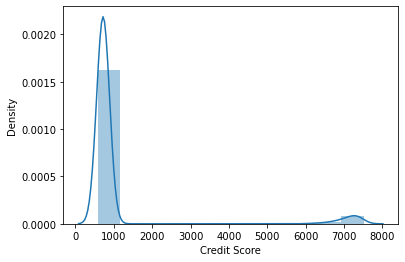

In [18]:
sns.distplot(credit_train['Credit Score'], bins=12)
#Majority of the credit score tend to be <1000 but there are quite a number of scores which are between the 6000-8000 range
#Distribution is skewed, majority of credit scores between 0-1000

In [19]:
#Since the distribution is skewed, we can take median of credit score to fill null values
median = credit_train['Credit Score'].median()
credit_train['Credit Score'] = credit_train['Credit Score'].fillna(median)
credit_train.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                     0
Annual Income                19111
Years in current job          3802
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              0
Bankruptcies                     0
Tax Liens                        0
dtype: int64

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

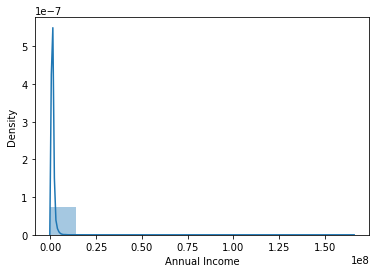

In [20]:
sns.distplot(credit_train['Annual Income'], bins=12)
#Large range of annual income of customers, with majority falling in the $(10**4 to 10**5) range.

In [21]:
#Annual Income distribution is also skewed, to replace annual value null values with median.
median = credit_train['Annual Income'].median()
credit_train['Annual Income'] = credit_train['Annual Income'].fillna(median)
credit_train.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         3802
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

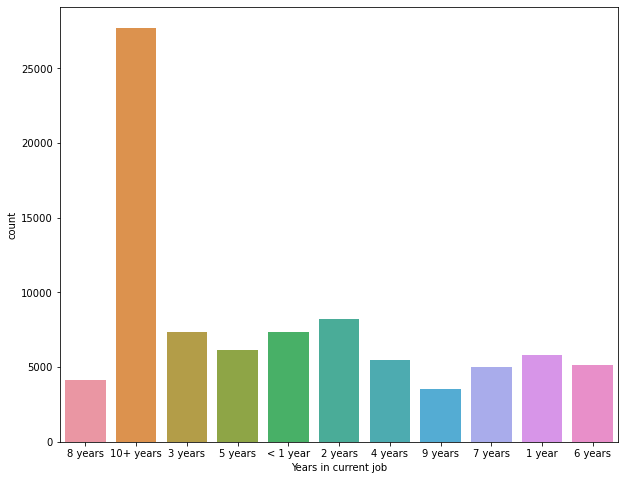

In [22]:
#Note that years in current job is a object
#Can use countplot for categorial data
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Years in current job'])

In [23]:
#From the plot, seems like 10+ years is the mode for years in current job.
#To replace the null values in years in current job with mode of 10+ years
credit_train['Years in current job'] = credit_train['Years in current job'].fillna('10+ years')
credit_train.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [24]:
#All duplicates removed, null rows, null values have been removed or imputed
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  object 
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  object 
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  object 
 6   Home Ownership             89593 non-null  object 
 7   Purpose                    89593 non-null  object 
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  flo

# Analysis of Dtype Object

<AxesSubplot:xlabel='Term', ylabel='count'>

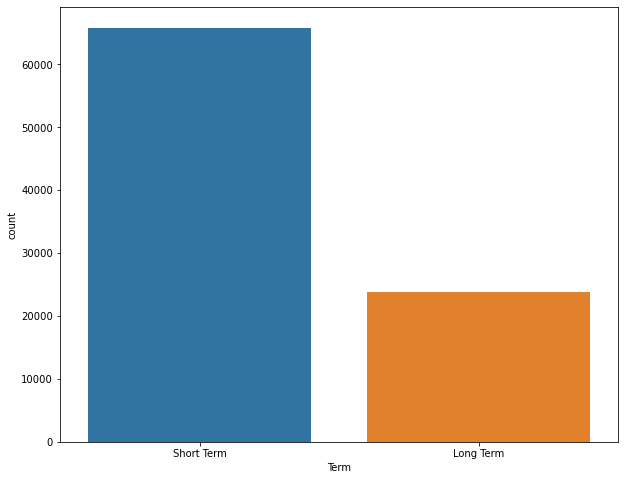

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Term'])
#Most of the loan term were short term rather than long term

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

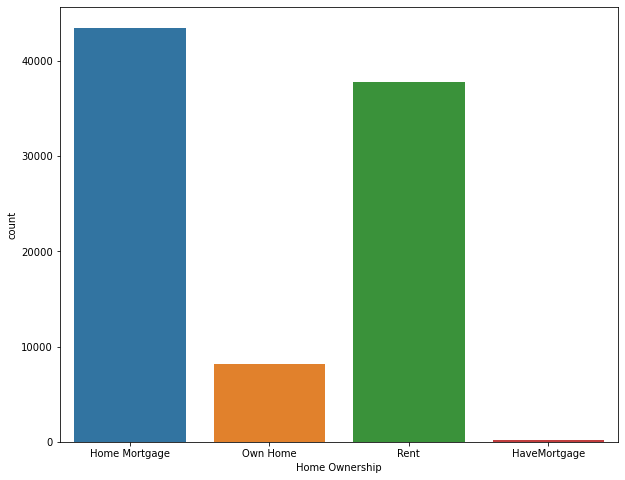

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Home Ownership'])

In [27]:
#Before merging Home Mortgage and HaveMortgage
Before_Merge = credit_train.groupby(['Home Ownership']).size()
Before_Merge

Home Ownership
HaveMortgage       182
Home Mortgage    43479
Own Home          8182
Rent             37750
dtype: int64

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

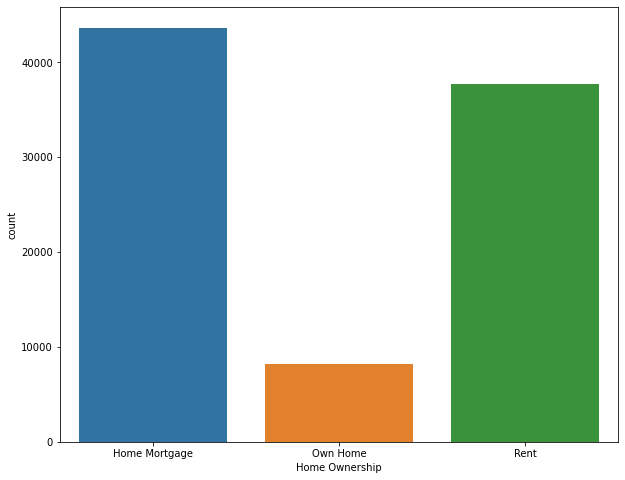

In [28]:
#To merge have mortgage and home mortgage columns together
credit_train.loc[credit_train['Home Ownership'] == 'HaveMortgage', 'Home Ownership'] = 'Home Mortgage'
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Home Ownership'])

In [29]:
#To check after merging
After_Merge = credit_train.groupby(['Home Ownership']).size()
After_Merge
#Most customers took home mortgage and homes were rented rather than owning their own homes.

Home Ownership
Home Mortgage    43661
Own Home          8182
Rent             37750
dtype: int64

<AxesSubplot:xlabel='Purpose', ylabel='count'>

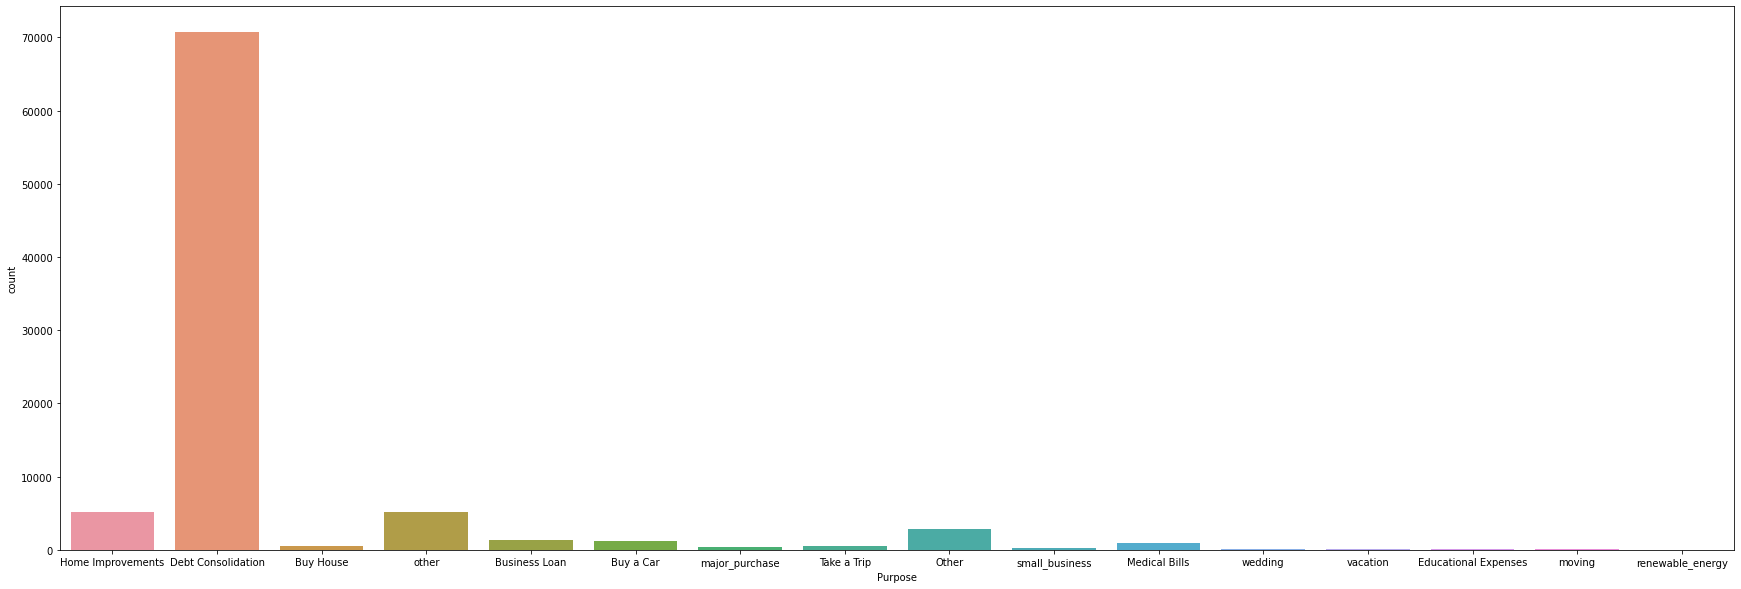

In [30]:
plt.figure(figsize=(30,10))
sns.countplot(credit_train['Purpose'])

In [31]:
#To take a look at the purposes before merging
Before_Merge = credit_train.groupby(['Purpose']).size()
Before_Merge

Purpose
Business Loan            1352
Buy House                 582
Buy a Car                1160
Debt Consolidation      70724
Educational Expenses       85
Home Improvements        5226
Medical Bills             980
Other                    2874
Take a Trip               487
major_purchase            330
moving                    135
other                    5210
renewable_energy            8
small_business            249
vacation                   89
wedding                   102
dtype: int64

<AxesSubplot:xlabel='Purpose', ylabel='count'>

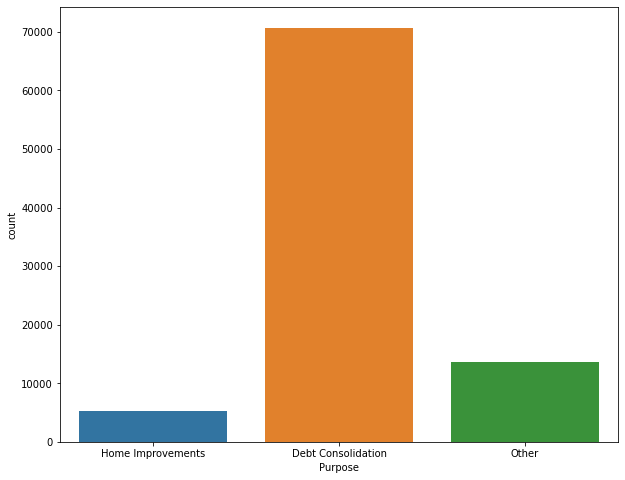

In [32]:
#To merge all other columns into Other, with the exception of Debt Consolidation and Home Improvements
y = ['Business Loan', 'Buy House', 'Buy a Car', 'Educational Expenses', 'Medical Bills', 'Take a Trip', 'major_purchase', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']
for x in y:
    credit_train.loc[credit_train['Purpose'] == x, 'Purpose'] = 'Other'

#Plot figure again
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Purpose'])

In [33]:
#Check the Purpose column
After_Merge = credit_train.groupby(['Purpose']).size()
After_Merge
#A large proportion of the loan purpose was for debt consolidation and others

Purpose
Debt Consolidation    70724
Home Improvements      5226
Other                 13643
dtype: int64

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

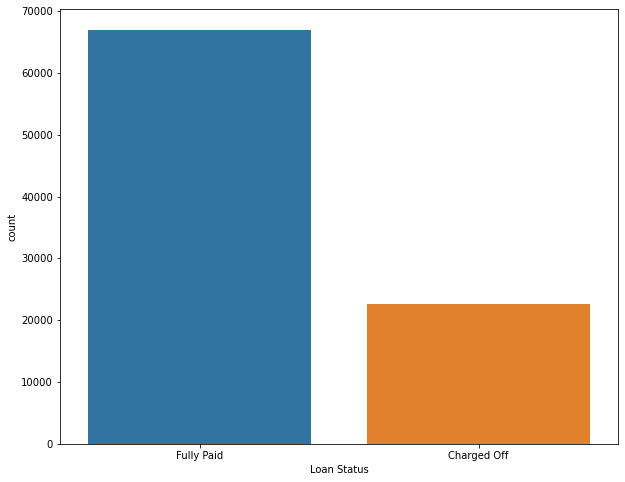

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Loan Status'])
#Most of the loan status were fully paid rather than charged off

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

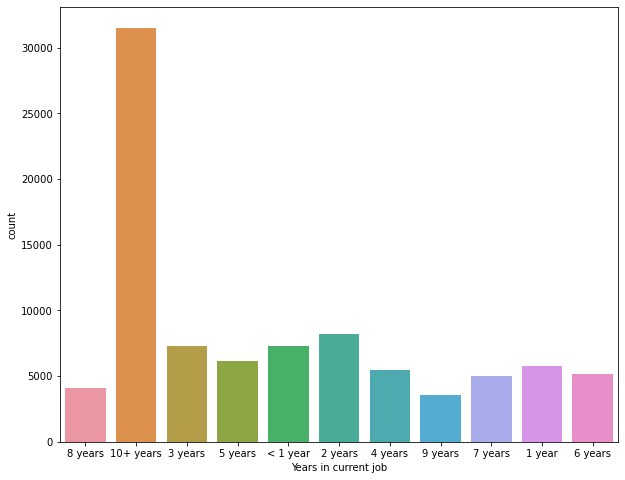

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Years in current job'])

In [36]:
#To take a look at the years in current job before merging
Before_Merge = credit_train.groupby(['Years in current job']).size()
Before_Merge

Years in current job
1 year        5808
10+ years    31528
2 years       8227
3 years       7321
4 years       5500
5 years       6128
6 years       5125
7 years       4986
8 years       4110
9 years       3543
< 1 year      7317
dtype: int64

<AxesSubplot:xlabel='Years in current job', ylabel='count'>

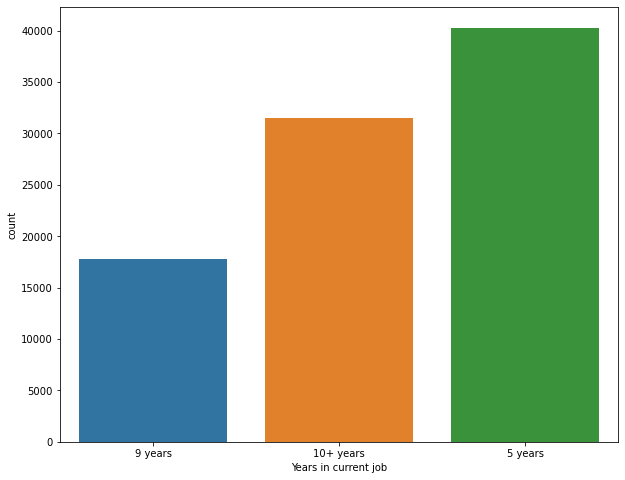

In [37]:
#To merge into < = 5 years, < = 9 years and keep 10+ years
b = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years']
for a in b:
    credit_train.loc[credit_train['Years in current job'] == a, 'Years in current job'] = '5 years'

d = ['6 years', '7 years', '8 years', '9 years']
for c in d:
    credit_train.loc[credit_train['Years in current job'] == c, 'Years in current job'] = '9 years'

#plot figure again
plt.figure(figsize=(10,8))
sns.countplot(credit_train['Years in current job'])

In [38]:
After_Merge = credit_train.groupby(['Years in current job']).size()
After_Merge
#Highest count is 0-5 years, followed by 10+ years and then 6-9 years for years in current job

Years in current job
10+ years    31528
5 years      40301
9 years      17764
dtype: int64

# Analysis of Dtype Float

In [39]:
credit_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.959300e+04,89593.000000,8.959300e+04,89593.000000,89593.000000,89593.000000,89593.000000,8.959300e+04,8.959300e+04,89593.000000,89593.000000
mean,1.305835e+07,1044.986227,1.331976e+06,18411.806653,18.242999,11.125735,0.165247,2.940685e+05,7.720317e+05,0.115534,0.028663
std,3.329246e+07,1402.833922,9.831257e+05,12142.347469,7.034235,4.996396,0.478399,3.720957e+05,8.766674e+06,0.347922,0.255365
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.803340e+05,715.000000,9.382200e+05,10176.970000,13.500000,8.000000,0.000000,1.130310e+05,2.771340e+05,0.000000,0.000000
50%,3.140940e+05,729.000000,1.169773e+06,16149.810000,17.000000,10.000000,0.000000,2.098550e+05,4.726700e+05,0.000000,0.000000
75%,5.326420e+05,739.000000,1.495984e+06,23932.400000,21.700000,14.000000,0.000000,3.676880e+05,7.913620e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<AxesSubplot:xlabel='Current Loan Amount', ylabel='Density'>

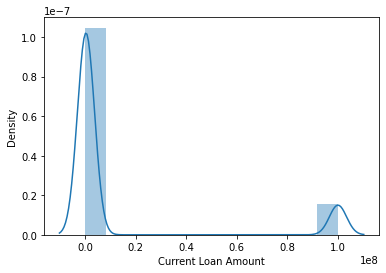

In [40]:
sns.distplot(credit_train['Current Loan Amount'], bins=12)
#Large range of loan amount, with the greatest concentration at $(10**5)
#Notice there is also another peak around the $(10**8) amount.

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

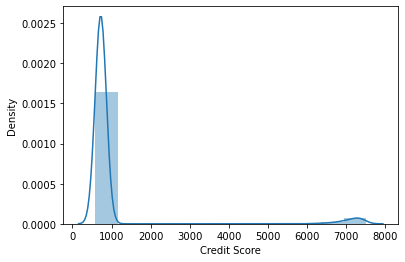

In [41]:
sns.distplot(credit_train['Credit Score'], bins=12)
#Majority of credit scores between 0-1000
#Another peak spotted ard 7000-8000 credit score range.

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

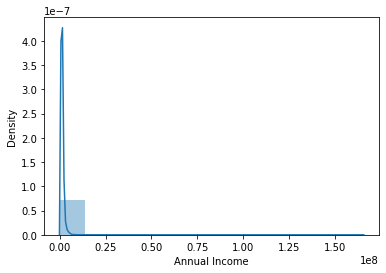

In [42]:
sns.distplot(credit_train['Annual Income'], bins=12)
#Large range of annual income of customers, with majority falling in the $(10**5 to 10**6) range.

<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

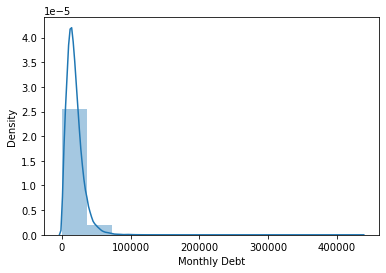

In [43]:
sns.distplot(credit_train['Monthly Debt'], bins=12)
#Ranges from $0-$40+K

<AxesSubplot:xlabel='Years of Credit History', ylabel='Density'>

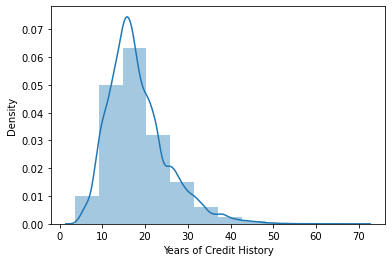

In [44]:
sns.distplot(credit_train['Years of Credit History'], bins=12)
#Majority of customers have between 0-40 years of credit history

<AxesSubplot:xlabel='Number of Open Accounts', ylabel='Density'>

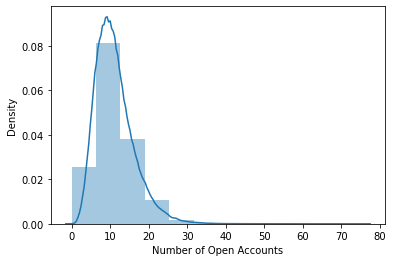

In [45]:
sns.distplot(credit_train['Number of Open Accounts'], bins=12)
#majority of customers have between 0-30 open accounts

<AxesSubplot:xlabel='Number of Credit Problems', ylabel='Density'>

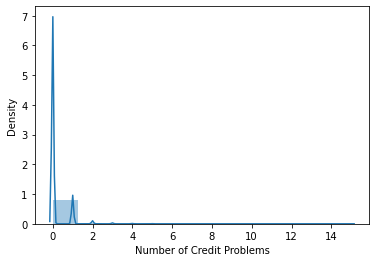

In [46]:
sns.distplot(credit_train['Number of Credit Problems'], bins=12)
#Majority of customers do not have credit problems but number ranges from 0-15

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Density'>

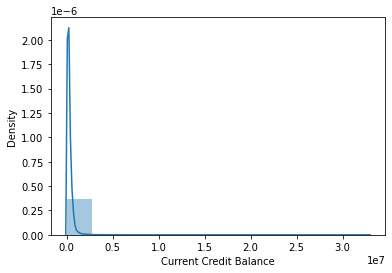

In [47]:
sns.distplot(credit_train['Current Credit Balance'], bins=12)
#Ranges from $(10**5 to 10**7) with majority at $10**5

<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Density'>

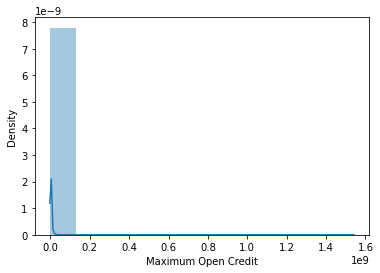

In [48]:
sns.distplot(credit_train['Maximum Open Credit'], bins=12)
#Ranges from $(10**5 to 10**9) with majority at $10**5

<AxesSubplot:xlabel='Bankruptcies', ylabel='Density'>

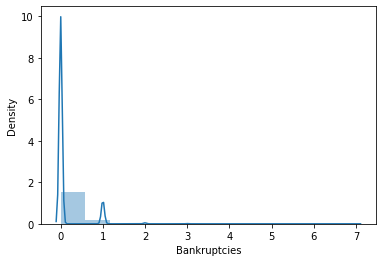

In [49]:
sns.distplot(credit_train['Bankruptcies'], bins=12)
#Majority of customers were not bankrupt before, but the value for each customer ranges from 0-7 

<AxesSubplot:xlabel='Tax Liens', ylabel='Density'>

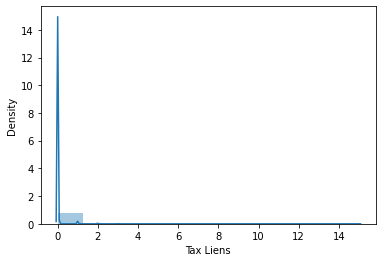

In [50]:
sns.distplot(credit_train['Tax Liens'], bins=12)
#Majority of customers do not have tax liens but number ranges from 0-15 per customer

# Map the String Type Data to Numerical Value for Model Training

In [51]:
Term_map = {'Short Term':0, 'Long Term':1}
Home_Ownership_map = {'Home Mortgage':0, 'Rent':1, 'Own Home':2}
Purpose_map = {'Debt Consolidation':0, 'Other':1, 'Home Improvements':2}
Loan_Status_map = {'Fully Paid':0, 'Charged Off':1}
Years_in_current_job_map = {'5 years':0, '10+ years':1, '9 years':2}

credit_train_map = credit_train.copy()

credit_train_map["Term"] = credit_train["Term"].map(Term_map)
credit_train_map["Home Ownership"] = credit_train["Home Ownership"].map(Home_Ownership_map)
credit_train_map["Purpose"] = credit_train["Purpose"].map(Purpose_map)
credit_train_map["Loan Status"] = credit_train["Loan Status"].map(Loan_Status_map)
credit_train_map["Years in current job"] = credit_train["Years in current job"].map(Years_in_current_job_map)

credit_train_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  int64  
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  int64  
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  int64  
 6   Home Ownership             89593 non-null  int64  
 7   Purpose                    89593 non-null  int64  
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  flo

# Correlation

In [52]:
credit_train_map.corr()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Loan Status,1.000000,-0.222058,0.138317,0.395577,-0.051713,0.009134,0.044188,-0.009806,0.012187,-0.029387,0.013690,0.006585,-0.009201,-0.009359,-0.003440,0.012742
Current Loan Amount,-0.222058,1.000000,-0.052592,-0.087037,0.031509,-0.003581,-0.009713,0.002760,-0.004982,0.017662,0.002009,-0.000309,0.004634,-0.001799,0.001856,-0.001136
Term,0.138317,-0.052592,1.000000,0.045816,0.070690,0.037998,-0.085340,-0.022429,0.152292,0.037985,0.078560,-0.024502,0.101034,0.008533,-0.027202,-0.002385
Credit Score,0.395577,-0.087037,0.045816,1.000000,-0.006904,0.005384,0.016875,-0.012029,0.000814,-0.011307,0.007060,-0.000435,0.000893,-0.003071,-0.004414,0.006403
Annual Income,-0.051713,0.031509,0.070690,-0.006904,1.000000,0.029769,-0.132823,0.042092,0.419778,0.137466,0.126303,-0.014594,0.269139,0.033759,-0.041459,0.036223
Years in current job,0.009134,-0.003581,0.037998,0.005384,0.029769,1.000000,-0.093724,-0.016192,0.071220,0.118460,0.032702,0.032467,0.049947,-0.002506,0.032292,0.010630
Home Ownership,0.044188,-0.009713,-0.085340,0.016875,-0.132823,-0.093724,1.000000,-0.041491,-0.173684,-0.126407,-0.105567,0.004627,-0.121693,-0.013512,0.005088,0.001207
Purpose,-0.009806,0.002760,-0.022429,-0.012029,0.042092,-0.016192,-0.041491,1.000000,-0.076268,0.003283,-0.088716,0.020608,-0.065892,0.006633,0.012622,0.008931
Monthly Debt,0.012187,-0.004982,0.152292,0.000814,0.419778,0.071220,-0.173684,-0.076268,1.000000,0.196582,0.409781,-0.054595,0.477091,0.036895,-0.079014,0.021254
Years of Credit History,-0.029387,0.017662,0.037985,-0.011307,0.137466,0.118460,-0.126407,0.003283,0.196582,1.000000,0.130498,0.062398,0.209259,0.030369,0.066426,0.018759


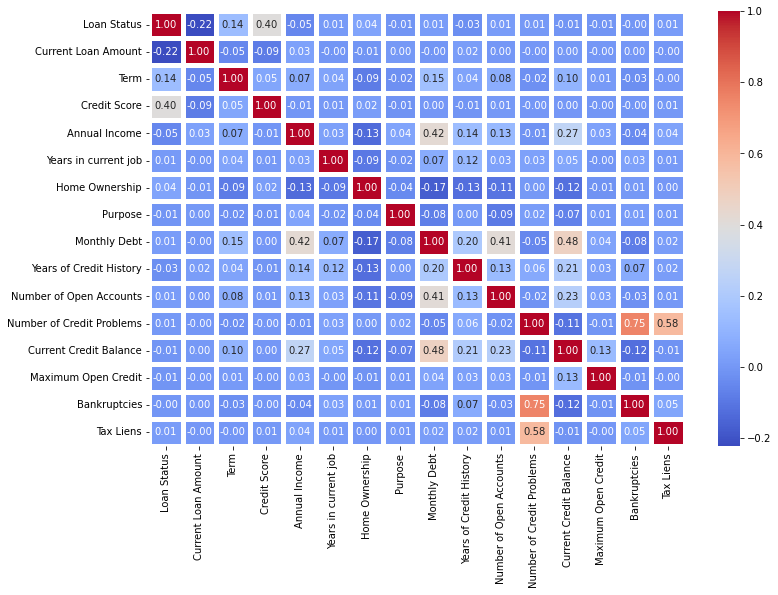

In [53]:
#Correlation Matrix

plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(credit_train_map.corr(),cmap = 'coolwarm', linewidths = 5, fmt = '.2f',annot = True);

#Seems like Loan Status has the highest correlation to credit score, current loan amount and term

To use credit_train df instead of credit_train_map to see the plotting more clearly.

array([<AxesSubplot:title={'center':'Charged Off'}>,
       <AxesSubplot:title={'center':'Fully Paid'}>], dtype=object)

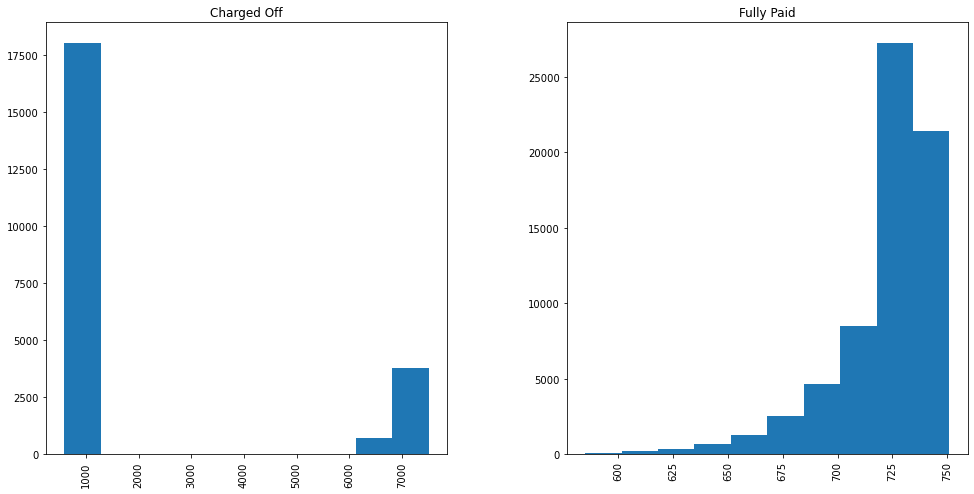

In [54]:
credit_train['Credit Score'].hist(by=credit_train['Loan Status'], figsize=(16,8))
#Credit scores of those who has loan status fully paid has a range of credit scores between 575 to 750.
#However, interestingly, those who have loan status charged off have either very low or very high credit scores.
#Based on understanding, higher credit scores would also mean that customers are more likely to have loan status fully paid.
#Not too sure if this is an anomaly and whether it was indicated wrongly for such customers who have very high credit scores but their loan statuses where charged off
#However, to keep these scores for modelling

array([<AxesSubplot:title={'center':'Charged Off'}>,
       <AxesSubplot:title={'center':'Fully Paid'}>], dtype=object)

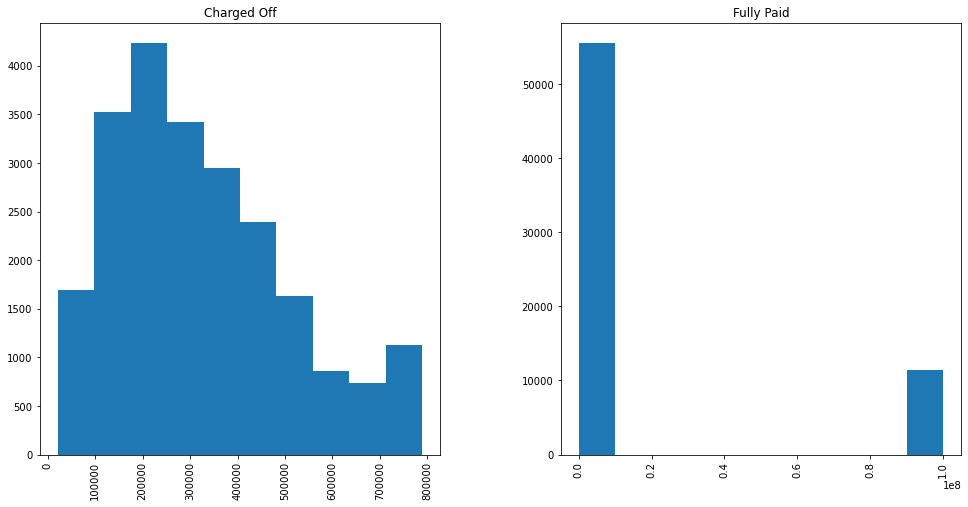

In [55]:
credit_train['Current Loan Amount'].hist(by=credit_train['Loan Status'], figsize=(16,8))
#Customers whose loan status is fully paid have loan amounts at either end of the spectrum. 
#Customers whose loan status is charged off have a wide range of loan amount.

In [56]:
credit_train.groupby(['Loan Status', 'Term']).size()/len(credit_train)
#Seems like for loans on longer term, more likely to be charged off

Loan Status  Term      
Charged Off  Long Term     0.093378
             Short Term    0.158729
Fully Paid   Long Term     0.171844
             Short Term    0.576049
dtype: float64

# Baseline Model - Logistic Regression

In [57]:
#Normalize data
credit_train_map_standardized = credit_train_map.drop('Loan Status', axis=1)
credit_train_map_standardized = (credit_train_map_standardized-credit_train_map_standardized.mean())/credit_train_map_standardized.std()
credit_train_map_standardized.std()

Current Loan Amount          1.0
Term                         1.0
Credit Score                 1.0
Annual Income                1.0
Years in current job         1.0
Home Ownership               1.0
Purpose                      1.0
Monthly Debt                 1.0
Years of Credit History      1.0
Number of Open Accounts      1.0
Number of Credit Problems    1.0
Current Credit Balance       1.0
Maximum Open Credit          1.0
Bankruptcies                 1.0
Tax Liens                    1.0
dtype: float64

In [58]:
#Take a look at the normalize data
credit_train_map_standardized.sample(5)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
90723,-0.388373,1.664452,-0.258752,-0.563009,-0.978700,0.609712,1.306144,-0.860785,-1.058111,-0.025165,-0.345417,-0.790303,-0.088064,-0.332067,-0.112243
70763,-0.373946,-0.600792,-0.214556,0.522790,1.636568,-0.929957,-0.480496,-0.122760,0.519886,-0.025165,-0.345417,0.352620,0.002975,-0.332067,-0.112243
69813,-0.372310,-0.600792,-0.235228,0.169702,-0.978700,0.609712,-0.480496,0.612964,0.804210,0.975556,-0.345417,2.731299,0.267324,-0.332067,-0.112243
90980,-0.384819,1.664452,-0.255188,-0.635539,1.636568,0.609712,-0.480496,-0.055491,-1.314002,-0.825742,-0.345417,-0.220603,-0.052490,-0.332067,-0.112243
80599,-0.383172,1.664452,-0.250911,0.537768,1.636568,-0.929957,-0.480496,-0.098882,-0.361517,0.174979,1.744889,-0.107603,-0.038938,-0.332067,3.803725


In [59]:
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Initialize Xs and y
X = credit_train_map_standardized #Already drop Loan Status during normalization
y = credit_train_map[["Loan Status"]]

#Initialize logistic regression model
logreg = LogisticRegression()

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#Fit X_train and y_train
logreg.fit(X_train,y_train)

#Use model to predict X_test
y_pred_lg = logreg.predict(X_test)

#Compare predictions to y_test
print('Accuracy: ', accuracy_score(y_test,y_pred_lg))

Accuracy:  0.7960623242109023


# Logistic Regression Model Evaluation

# Confusion Matrix

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


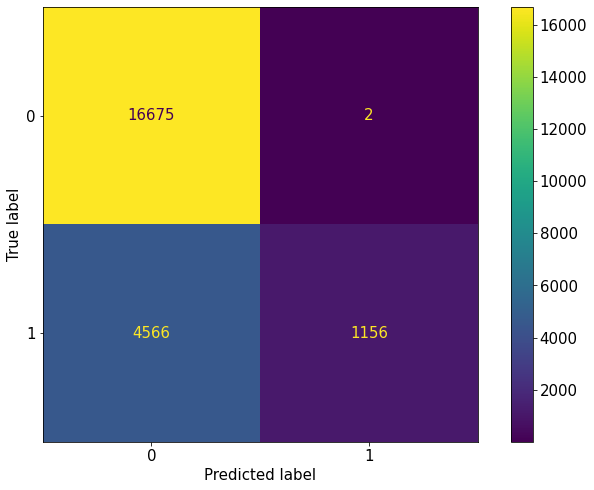

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_pred_lg)
cm

cm_display = ConfusionMatrixDisplay(cm).plot()

False Negative is low at 2 cases. > This model predicts 2 customers to not be able to repay their loans when in actual fact they were able to do so.<br>
False Positive is high at 4566 cases. > This model predicts 4566 customers to be able to repay their loans when in actual fact they were not able to do so.<br>
False Positive rate is rather high. Need to reduce this % if not bank will make a lot of losses from unpaid debts.

# ROC Curve

AUC score:  0.7466101356201447


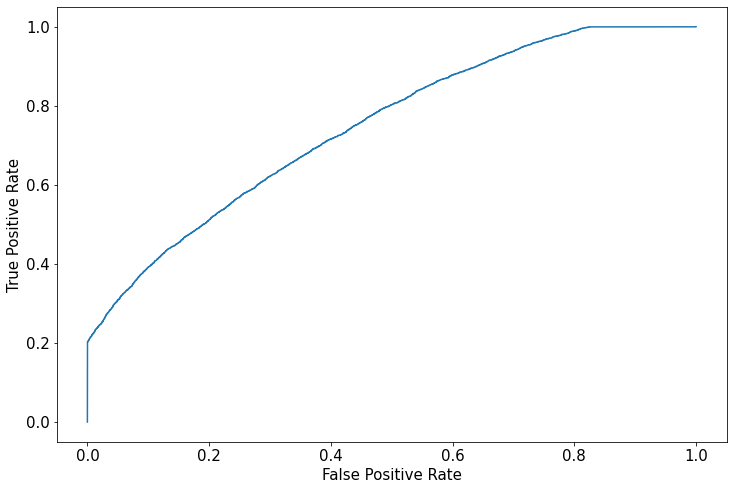

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

y_score = logreg.predict_proba(X_test)[:,1]
y_score

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,y_score)) 

A model with an AUC score of 0.5 is no better than a model that performs random guessing.<br>
The higher the AUC score, the better the model is able to classify observations into classes.<br>
Based on the following rule of thumb from Hosmer and Lemeshow in Applied Logistic Regression (p. 177),<br>
0.5 = No discrimination<br>
0.5-0.7 = Poor discrimination<br>
0.7-0.8 = Acceptable discrimination<br>
0.8-0.9= Excellent discrimination<br>
'>0.9 = Outstanding discrimination<br>

The Logistic Regression model with AUC score of 0.75 is still within acceptable level.

# KNearest Neighbours

In [62]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

#Assign your data and target
X = credit_train_map_standardized #Already drop Loan Status during normalization
y = credit_train_map[["Loan Status"]]

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)

#Train the model on the training set (using K=1)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#Test the model on the testing set, and check the accuracy
y_pred_knn = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred_knn))

Accuracy:  0.7115049779007991


# Decision Trees

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

X = credit_train_map_standardized #Already drop Loan Status during normalization
y = credit_train_map[["Loan Status"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
si = SimpleImputer(strategy='most_frequent')
X_train = si.fit_transform(X_train)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
X_test = si.transform(X_test)
y_pred_dt= dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred_dt))

Accuracy:  0.7082459038349926


KNearest Neighbours and Decision Trees have about the same accuracy score, which is lower than Logistic Regression.<br>
To try to improve the model for KNearest Neighbours using GridSearch.

# GridSearch for KNearest Neighbours

In [64]:
#Load gridsearch
from sklearn.model_selection import GridSearchCV

X = credit_train_map_standardized #Already drop Loan Status during normalization
y = credit_train_map[["Loan Status"]]

#Setup our GridSearch Parmaters
search_parameters = {'n_neighbors':  [1,20]}

#Intialize KNN 
knn = KNeighborsClassifier()

#Intialize GridSearchCV
clf = GridSearchCV(knn, search_parameters)

#Fit our training data
clf.fit(X,y)

print("Best Estimator:", clf.best_estimator_.n_neighbors)
print("Best Score:", clf.best_score_)

Best Estimator: 20
Best Score: 0.7949617071391588


# KNearest Neighbours Model Evaluation

In [65]:
#Using K=20 for the KNearest Neighbours model

#Assign your data and target
X = credit_train_map_standardized #Already drop Loan Status during normalization
y = credit_train_map[["Loan Status"]]

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)

#Train the model on the training set (using K=20)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

#Test the model on the testing set, and check the accuracy
y_pred_knn = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred_knn))

Accuracy:  0.7943211750524577


# Confusion Matrix

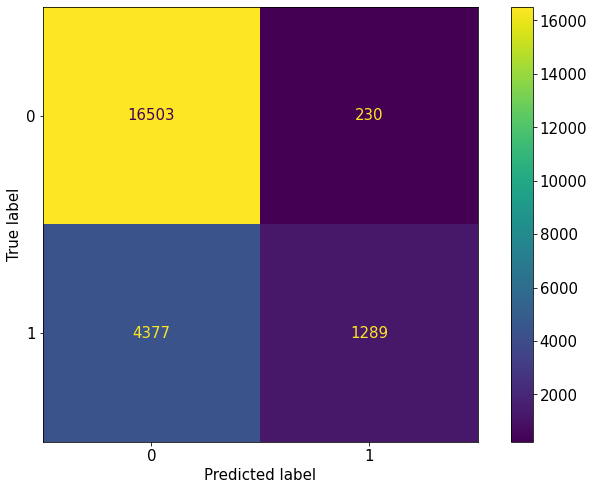

In [66]:
font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_pred_knn)
cm

cm_display = ConfusionMatrixDisplay(cm).plot()

Number of false positive decreased but number of false negatives increased as well.

# ROC Curve

AUC score:  0.7175382746172527


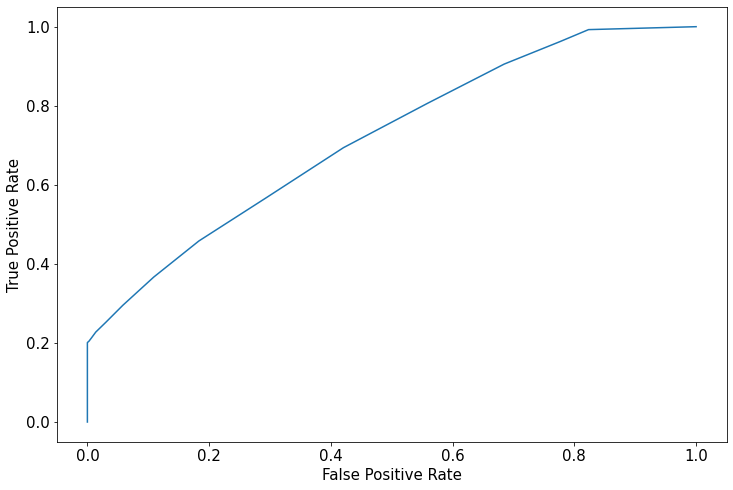

In [67]:
y_score = knn.predict_proba(X_test)[:,1]
y_score

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print('AUC score: ',roc_auc_score(y_test,y_score))

AUC score for KNearest Neighbours perform slightly poorer than for Logistic Regression.

# Summary

The aim of the project was to use historical bank loan data to predict a client's ability to repay future loans based on client's info and credit history.<br>

Data cleansing was performed on the dataset along with analysis of the data distribution pattern. String type data was mapped to numerical value before finding correlation of different variables with the target. Credit Score, Current Loan Amount and Term were most closely related to the target (Loan Status), of which Credit Score shows the strongest correlation at 0.40.<br>

Before building the Logistic Regression Baseline Model, apart from the assigning of string type data to a numerical value, the numerical data was also normalized.<br>

The Logistic Regression Model did considerably well with an test accuracy of ~0.80 and AUC score of ~0.75. However, upon further analysis via the Confusion Matrix, it was made aware that the number of false positives are high and account for almost all the ~0.20 inaccuracies score in test result.<br>

The KNearest Neighbours and Decision Trees model had test accuracies of ~0.71. Upon applying Grid Search to find the optimal number of neighbours for the KNearest Neighbours model, the test accuracy was improved to ~0.79. However, when evaluating the model, the AUC score was ~0.72 and while the number of false positives decreased slightly, it was compensated with the increase in number of false negatives.<br>

Overall, the performance of both the Logistic Regression and KNearest Neighbours models are about the same. However, it is necessary to improve the accuracy scores of either model and reduce the number of false positives so that the bank would not suffer losses from charged off debts. A balance between the number of false positives and false negatives with a higher accuracy score would be more desirable in this scenario.<br>

Limitations: About 4 columns in the dataset had between 4-53% of null values. It would be good if these values could be provided for better analysis and model prediction. Some other client info such as liquid assets and value of collaterals could be provided for better data analysis and modelling.